In [39]:
#1 import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [40]:
path = r'/Users/ryansmitz/Instacart_Basket_Analysis_11_28_23'

In [41]:
#1 imported the large merged dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged.pkl'))

In [42]:
pd.set_option('display.max_columns', None)

In [43]:
#check the dataframe visually
df_merged.head(15)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,order_day_of_week_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_purchase,purchase_flag,median_order_frequency,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Tuesday,Second slowest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,Regular customer
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,Regular customer
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,Regular customer
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,Regular customer
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,Regular customer
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,both,Low-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,Regular customer


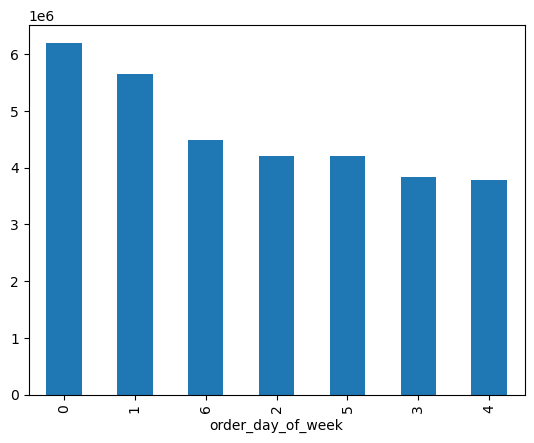

In [44]:
#2 create a bar chart based on order_day_of_week
bar1 = df_merged['order_day_of_week'].value_counts().plot.bar()

In [45]:
#export visualization
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week.png'))

In [46]:
#check max value of prices column
df_merged['prices'].max()

99999.0

/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


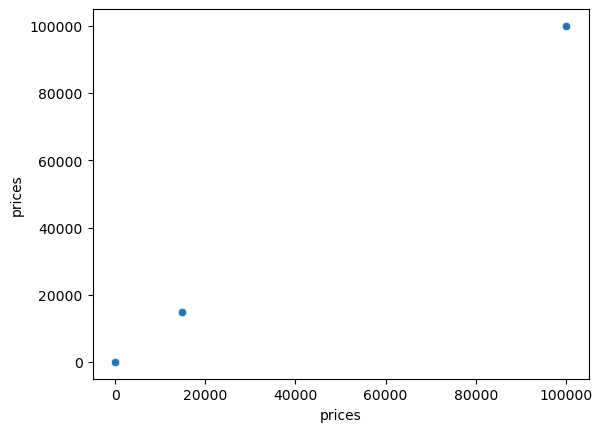

In [47]:
#visualize the price column with a scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df_merged)

In [48]:
#export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_x_vs_price_y.png'))

In [49]:
#replace outliers in prices column with null values
df_merged.loc[df_merged['prices'] >100, 'prices'] = np.nan

In [50]:
#check new max value for prices column
df_merged['prices'].max()

25.0

In [51]:
df_merged['prices'].describe()

count    3.239973e+07
mean     7.780056e+00
std      4.242678e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.300000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

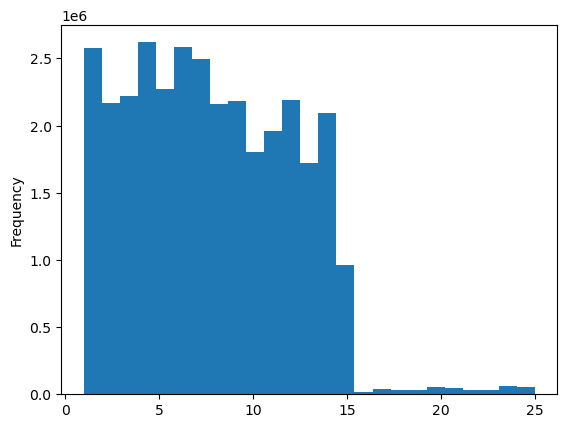

In [52]:
hist1 = df_merged['prices'].plot.hist(bins = 25)

In [53]:
#export visualization
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_25bin.png'))

In [55]:
#create a set of random true and false values
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [56]:
#divide that set into a big category
big = df_merged[dev]

In [57]:
#divide that set into a small category
small = df_merged[~dev]

In [58]:
#check the length of the total set of values
len(df_merged)

32404859

In [59]:
#check that the big set plus the small set are equal to the total number of values
len(big) + len(small)

32404859

In [60]:
df_2 = small[['order_day_of_week','prices']]

/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

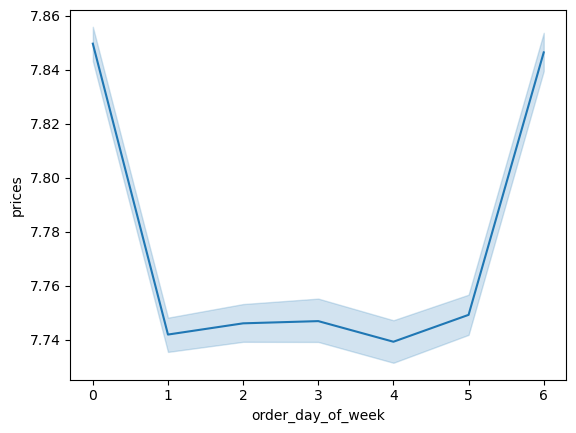

In [61]:
#create a line chart
line1 = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [62]:
#export the line chart
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_prices_dow.png'))

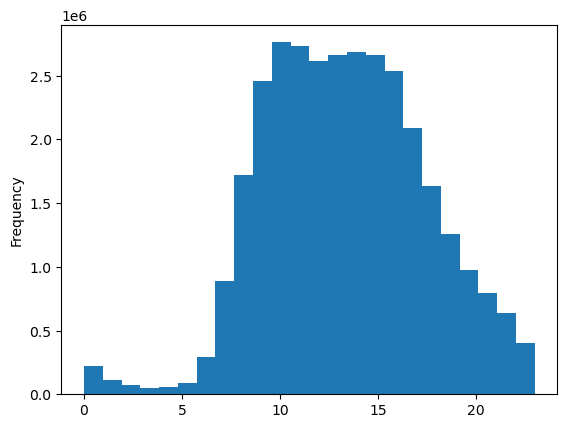

In [63]:
#3 create histogram of order_hour_of_day
hist2 = df_merged['order_hour_of_day'].plot.hist(bins = 24)

In [64]:
#export histogram visualization
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day_frq.png'))

#This histogram shows that orders are most frequent during the midday hours, with the period between 1pm and 2pm having the highest frequency. Order frequency trails off in the afternoon and evening hours, with the lowest frequency occuring in the early morning hours.

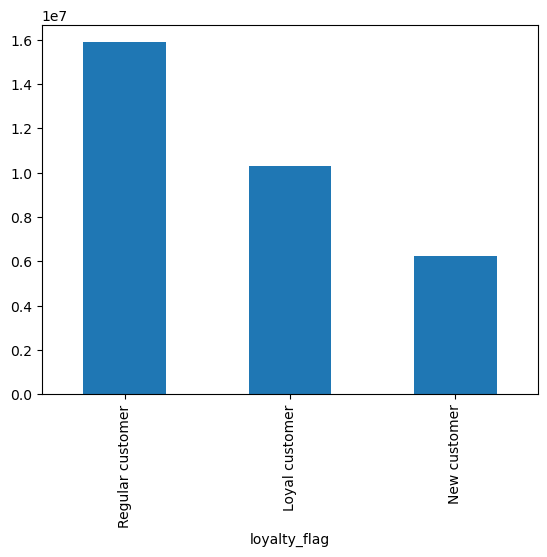

In [65]:
#4 distribution of orders among customers in terms of loyalty
bar2 = df_merged['loyalty_flag'].value_counts().plot.bar()

In [66]:
#export bar chart visualization
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_frq.png'))

In [67]:
#5 check for difference in expenditure among customers in terms of loyalty
df_3 = small[['order_hour_of_day','prices']]

/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

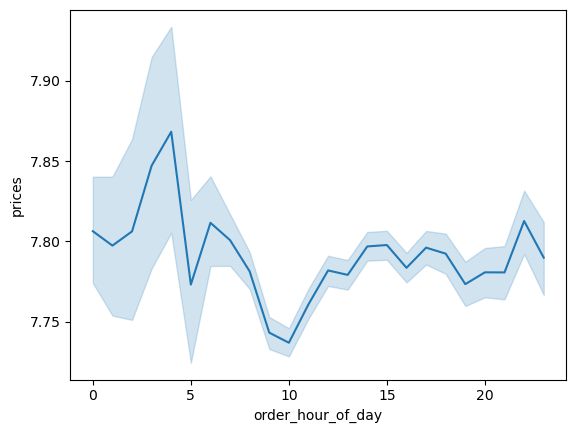

In [68]:
#create line chart
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [69]:
#export line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_day_prices.png'))

In [70]:
#6 check for connnection between age and number of dependents
df_5 = small[['age','n_dependents']]

/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

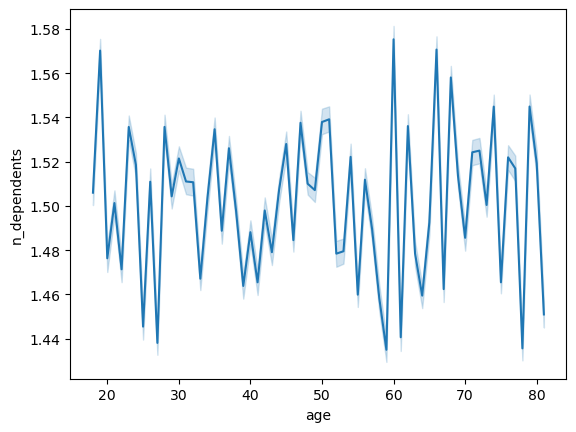

In [71]:
line_3 = sns.lineplot(data = df_5, x = 'age',y = 'n_dependents')

#The line chart shows no clear connection between age and number of dependents, although a best fit line would help indicate this. This is not what I would have predicted.

In [72]:
#export line chart
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_dependants.png'))

/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryansmitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


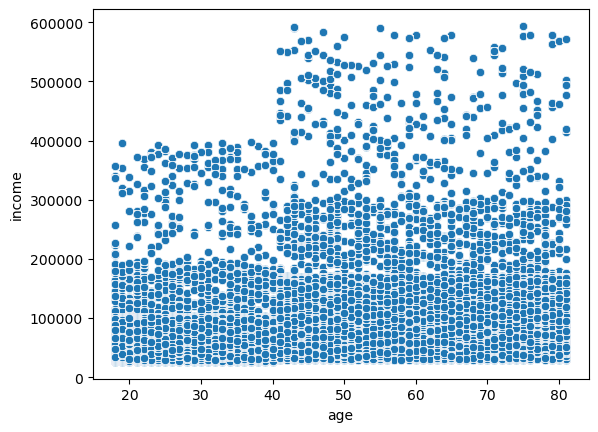

In [73]:
#create scatterplot
scatterplot2 = sns.scatterplot(x = 'age', y = 'income',data = df_merged)

#The highest incomes on the scatterplot (incomes over $400,000) occur almost exclusively after age 40. There are plenty of lower income customers in every age group. There is also a greater concentration of medium-level incomes after age 40.

In [74]:
#export visualization
scatterplot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_income.png'))